# Data Collection

0.02730584144592285


(array([  1.,   2.,   1.,   0.,   2.,   0.,   2.,   4.,   7.,  10.,  12.,
         17.,  18.,  32.,  38.,  58.,  69.,  68.,  72.,  97., 126., 164.,
        170., 210., 222., 225., 236., 280., 277., 297., 283., 302., 292.,
        256., 219., 199., 187., 170., 118.,  84.,  57.,  43.,  24.,  23.,
         15.,   6.,   2.,   0.,   2.,   1.]),
 array([-96.71432761, -95.2464561 , -93.77858459, -92.31071309,
        -90.84284158, -89.37497007, -87.90709856, -86.43922706,
        -84.97135555, -83.50348404, -82.03561253, -80.56774103,
        -79.09986952, -77.63199801, -76.1641265 , -74.696255  ,
        -73.22838349, -71.76051198, -70.29264048, -68.82476897,
        -67.35689746, -65.88902595, -64.42115445, -62.95328294,
        -61.48541143, -60.01753992, -58.54966842, -57.08179691,
        -55.6139254 , -54.14605389, -52.67818239, -51.21031088,
        -49.74243937, -48.27456786, -46.80669636, -45.33882485,
        -43.87095334, -42.40308183, -40.93521033, -39.46733882,
        -37.999467

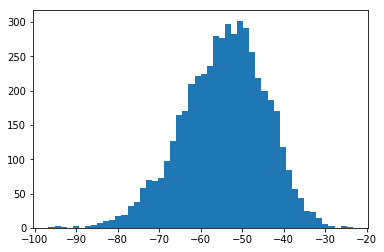

In [60]:
from math import*
import __main__
global PI
import os
import time
PI=float(acos(-1))

import random
import numpy as np
import multiprocessing as mp

import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm

%matplotlib inline

rs_number = 123
random.seed(rs_number)

data_size = 5000;

random_selection = 0

if random_selection==0:
    ''' random selection'''
    mu = [10,10]
    cov = [[1, 0], [0, 1]]
    datasets = np.random.multivariate_normal(mu, cov, data_size)
#     x0 = np.random.uniform(0,3,data_size)
#     x1 = np.random.uniform(0,3,data_size)
#     x = [x0, x1]
#     datasets = np.reshape(x,(data_size,2))
else:
    '''latin hypercube sampling'''

# print(np.shape(datasets)) 
# plt.plot(datasets[:,0],datasets[:,1],'o')

def ssh(X):
#     c = 4
#     g = sin(X[0]+X[1])
#     g = (X[0]+X[1])**2
#     g = 4-X[0]/4 + sin(4*X[0])-X[1]
    g = 5 -X[1]- 0.5*(X[0]-0.1)**2
#     g = 0.7*norm.pdf(X,3,1) + 0.3*norm.pdf(X,6,1)
#     g = 0.7*norm.ppf(X, loc=3, scale=1) + 0.3*norm.ppf(X, loc=10, scale=1)
#     g = lognorm.ppf([0.001, 0.5, 0.999], X)
    return g


# map async parallel 
# pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(processes = 2)

start = time.time()
results_map = pool.map(ssh, datasets)
end = time.time() 
print(end - start) #0.0037827491760253906



# print(results_map)

# # rare event probability
# num = 0
# for i in range(data_size):
#     if results_map[i]<0:
#         num = num+1

# prob = num/data_size
# print(prob)

# results_map = datasets**2
# print(results_map)
plt.hist(results_map,50)


# results_map = 

# Data classification and preprocessing

In [61]:
results_map_sort = sorted(results_map) # note that sorted change the sort but didn't change the original one
# print(results_map_sort)
median_value = results_map_sort[data_size//2]
# median_value = 3.5
print(median_value)

results_map_new = np.zeros((data_size,1))
output_scikit = np.zeros(data_size)

for i in range(data_size):
    if results_map[i] > median_value:
        results_map_new[i,:] = 1
        output_scikit[i] = 1
    else:
        results_map_new[i,:] = 0
        output_scikit[i] = 0

y_data = output_scikit

-53.754341123032944


# Training by classification 

In [62]:
# scikit-learn MLP training 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression

# preprocessing data scale? X is [1,10]
trans_mean = np.mean(datasets)
trans_std = np.std(datasets)

data_scale = 2
if data_scale==0:
    X_data = preprocessing.scale(datasets)
elif data_scale ==1:
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    X_data = min_max_scaler.fit_transform(datasets)
elif data_scale ==2:
    scaler = preprocessing.StandardScaler().fit(datasets) # can be used for the following iteration 
    X_data = scaler.transform(datasets)  

# sgd optimizer 
# mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4, hidden_layer_sizes=(128, 128),
#                     random_state=1, max_iter=10000,verbose=True)

mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4, hidden_layer_sizes=(10,10,10,10),
                    random_state=1, max_iter=1000,verbose=True,learning_rate = 'adaptive')

# lbfgs - very slow 
# mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)
# adam 
# mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)

# testing and training data 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=rs_number)

# training 
# kernel = 1.0 * RBF(1.0)
# mlp = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_train, y_train)
# print(mlp,score(X_train, y_train))
mlp.fit(X_train, y_train) 

# mlp = LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',verbose=1, n_jobs = 4).fit(X_train, y_train)

#testing
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (train) for %0.1f%% " % (accuracy * 100))

# # cross-validation 
# score_cv = cross_val_score(mlp, X_data, y_data,cv=5)  
# print(score_cv)

## tuning hyperparameters 

# 10000 data, [0.84457771 0.854      0.8385     0.845      0.85992996], default
# 10000 data, [0.82908546 0.835      0.8235     0.8185     0.82391196], feature[1,10] normalization 效果一般
# 10000 data, [0.86206897 0.8605     0.8375     0.854      0.8154077 ], feature[0,1] normalization 效果一般
# 10000 data, [0.84457771 0.854      0.8385     0.845      0.85992996], StandardScaler()

Iteration 1, loss = 0.76087571
Iteration 2, loss = 0.68414859
Iteration 3, loss = 0.64678716
Iteration 4, loss = 0.60202065
Iteration 5, loss = 0.53657986
Iteration 6, loss = 0.45238186
Iteration 7, loss = 0.36385613
Iteration 8, loss = 0.28910983
Iteration 9, loss = 0.23170169
Iteration 10, loss = 0.18785318
Iteration 11, loss = 0.15219090
Iteration 12, loss = 0.12476803
Iteration 13, loss = 0.10312657
Iteration 14, loss = 0.08584464
Iteration 15, loss = 0.07160478
Iteration 16, loss = 0.06034986
Iteration 17, loss = 0.05198921
Iteration 18, loss = 0.04548206
Iteration 19, loss = 0.04043807
Iteration 20, loss = 0.03642885
Iteration 21, loss = 0.03336712
Iteration 22, loss = 0.03088296
Iteration 23, loss = 0.02834407
Iteration 24, loss = 0.02646170
Iteration 25, loss = 0.02469529
Iteration 26, loss = 0.02313446
Iteration 27, loss = 0.02251161
Iteration 28, loss = 0.02119272
Iteration 29, loss = 0.02031611
Iteration 30, loss = 0.01858343
Iteration 31, loss = 0.01768858
Iteration 32, los

# ML rank VS FEM rank

[2084, 2211, 3433, 3848, 3445, 119, 1861, 251, 4487, 3994, 2640, 1823, 3146, 2299, 281, 4995, 4129, 1598, 1323, 2786]
[2084, 2211, 3433, 3848, 3445, 119, 1861, 4487, 251, 3146, 2640, 4995, 3994, 1823, 2299, 2786, 281, 4129, 600, 1527]


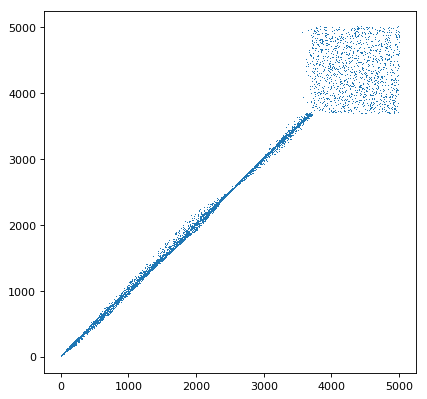

In [63]:
sort_index_FEM = np.argsort(results_map)
probs = mlp.predict_proba(X_data)
# print(probs)
sort_index_mlp = np.argsort(probs[:][:,1])

sort_FEM = sort_index_FEM.tolist()
sort_mlp = sort_index_mlp.tolist()

print(sort_FEM[0:20])
print(sort_mlp[0:20])

rank_mlp = []
for j in range(data_size):
    rank_fem = sort_FEM[j]
    rank_mlp0 = sort_mlp.index(rank_fem)
#     print(rank_mlp0)
    rank_mlp.append(rank_mlp0)


plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(data_size),rank_mlp,',')
